**SHORTEST PATH PROBLEM**

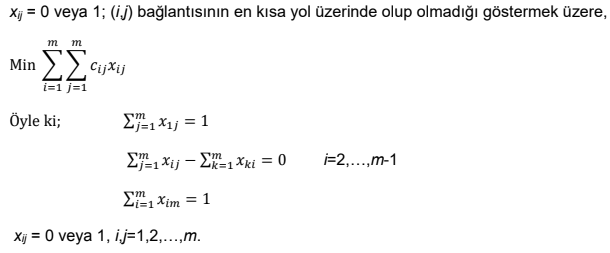

In [78]:
import gurobipy as gp
from gurobipy import GRB
from gurobipy import quicksum
mdl = gp.Model('Shortest Path Example')

In [79]:
#Parameters
num_of_nodes = 6
pairs = [(1,2),(1,3),(2,3),(2,4),(2,5),(3,5),(4,6),(5,4),(5,6)]
costs = [2,4,1,4,2,3,2,3,2]
N = [i+1 for i in range(num_of_nodes)]
S,c = gp.multidict({pairs[i]:costs[i] for i in range(len(pairs))})

*Variables*

In [80]:
x = mdl.addVars(S, vtype=GRB.BINARY, name='x')

*Objective Function*

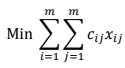

In [81]:
mdl.setObjective(quicksum(c[i,j]*x[i,j] for i,j in S),GRB.MINIMIZE)

*Constraint 1*

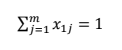

this means our subject must start from starting point 

In [82]:
mdl.addConstr(quicksum(x[r,j] for r,j in S if r==1) == 1)

<gurobi.Constr *Awaiting Model Update*>

*Constraint 2*

if subject comes nodes which between starting and ending point must leave!

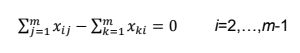

In [83]:
mdl.addConstrs((quicksum(x[i,j] for r,j in S if r==i) - quicksum(x[k,i] for k,m in S if m==i)) == 0 for i in range(2,num_of_nodes-1))

{2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>,
 4: <gurobi.Constr *Awaiting Model Update*>}

*Constraint 3*

Subject must finish tour at end point

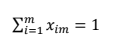

In [84]:
mdl.addConstr(quicksum(x[i,num_of_nodes] for i,j in S if j==num_of_nodes) == 1)

<gurobi.Constr *Awaiting Model Update*>

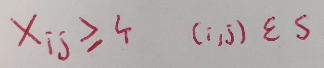

Subject must visit at least 4 nodes. This constraint has changed optimal value

In [85]:
mdl.addConstr(quicksum(x[i,j] for i,j in S) >= 4)

<gurobi.Constr *Awaiting Model Update*>

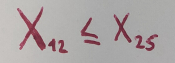

Subject must go node 5 from node 2 if it goes node 2 from node 1

In [86]:
mdl.addConstr(x[1,2] <= x[2,5])

<gurobi.Constr *Awaiting Model Update*>

In [87]:
mdl.optimize()

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11.0 (22621.2))

CPU model: Intel(R) Core(TM) i3-10100F CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 7 rows, 9 columns and 25 nonzeros
Model fingerprint: 0xe0ddebd1
Variable types: 0 continuous, 9 integer (9 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 4e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+00]
Presolve removed 7 rows and 9 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 8 available processors)

Solution count 1: 9 

Optimal solution found (tolerance 1.00e-04)
Best objective 9.000000000000e+00, best bound 9.000000000000e+00, gap 0.0000%


In [88]:
for i in mdl.getVars():
  if i.x > 0:
    print(i.VarName, i.x)

x[1,2] 1.0
x[2,5] 1.0
x[4,6] 1.0
x[5,4] 1.0
